<a href="https://colab.research.google.com/github/YashC1308/QSTP-MachineLearning/blob/main/QSTP_Linear_regression_A_1_YC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [109]:
from numpy.core.fromnumeric import shape
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('QSTP_LinReg.csv')


features = ['AT','V','AP','RH']
X = df.loc[:, features]
y = df.loc[:, ['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

norm = MinMaxScaler().fit(y_train)
y_train_norm = norm.transform(y_train)
y_test_norm = norm.transform(y_test)

n_samples = y_train_norm.size  # No. of samples taken
n_features = 4  # No. of features / No. of values in X
n_targets = 1  # No. of target variables / No. of values in y


In [110]:
#loss function
def loss_fn(y_hat, y):
    return 1/n_samples * np.sum((y_hat - y)**2)

In [111]:
#gradient descent implementation

W = np.random.normal(size=(n_targets, n_features))
b = np.random.normal(size=(n_targets, 1))

loss_history = []

learning_rate =   0.01 
num_epochs = 100  

for epoch in range(num_epochs):
    loss = 0
    for i in range(n_samples):
        X_i, y_i = X_train_norm[i].reshape(-1,1), y_train_norm[i].reshape(-1,1)
        y_hat = np.dot(W, X_i) + b
        
        dL_dy = 2*(y_hat-y_i)
        
        dy_dW = X_i
        dy_db = 1
        
        dL_dW = np.dot(dL_dy, dy_dW.T)
        dL_db = dL_dy * dy_db
        
        W -= learning_rate * dL_dW
        b -= learning_rate * dL_db

        loss += loss_fn(y_hat, y_i)
    
    loss_history.append(loss)
    print("Epoch: {}, Loss: {}".format(epoch+1, loss))

Epoch: 1, Loss: 0.03192479064326155
Epoch: 2, Loss: 0.004459955497903041
Epoch: 3, Loss: 0.003892141638861122
Epoch: 4, Loss: 0.0038171366316638224
Epoch: 5, Loss: 0.0037964323287142062
Epoch: 6, Loss: 0.0037896072848122232
Epoch: 7, Loss: 0.0037872465620643974
Epoch: 8, Loss: 0.0037863932190413175
Epoch: 9, Loss: 0.003786066214278786
Epoch: 10, Loss: 0.003785931496889216
Epoch: 11, Loss: 0.0037858714726361526
Epoch: 12, Loss: 0.003785842703628367
Epoch: 13, Loss: 0.0037858280770322775
Epoch: 14, Loss: 0.0037858203183179793
Epoch: 15, Loss: 0.0037858160857968002
Epoch: 16, Loss: 0.003785813736250421
Epoch: 17, Loss: 0.003785812418245071
Epoch: 18, Loss: 0.003785811674334208
Epoch: 19, Loss: 0.0037858112529558898
Epoch: 20, Loss: 0.0037858110137822362
Epoch: 21, Loss: 0.003785810877868289
Epoch: 22, Loss: 0.0037858108005814086
Epoch: 23, Loss: 0.003785810756615801
Epoch: 24, Loss: 0.003785810731599928
Epoch: 25, Loss: 0.003785810717364483
Epoch: 26, Loss: 0.0037858107092631267
Epoch: 27

[[-0.91995627 -0.1751863   0.03166132 -0.15920537]]
[[1.08597538]]


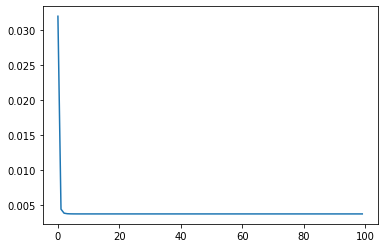

In [112]:
# Plot change in history. X-axis is the epochs
#how quickly W and b were achieved and loss history
plt.plot(loss_history)
print(W)
print(b)

In [114]:
square_diff =[]
mean_diff = []
mean = np.mean(y_test_norm)

for i in range(y_test_norm.size):
  X_i, y_i = X_test_norm[i].reshape(-1,1), y_test_norm[i].reshape(-1,1)
  pred_values = np.dot(W, X_i) + b
  square_diff.append((y_i - pred_values)**2)
  mean_diff.append((y_i - mean)**2)

sum1 = 0
sum2 = 0

for i in range(len(square_diff)):
  sum1+=square_diff[i]
  sum2+=mean_diff[i]

r_square = 1 - (sum1/sum2)

print("R-squared value")
print(r_square)

R-squared value
[[0.93157973]]
